In [1]:
import numpy as np
from pylab import plt
import sys
import snronpairs_quad_dbl as sn
import contfunc as cf



1825 6213 392 654 2111 651 3917


/var/folders/1k/7db4shj965v6jkny3rgd0cjc0000gn/T/ipykernel_10270/3998630718.py:109: UserWarning: The following kwargs were not used by contour: 'alphas'
  cfset = ax1.contourf(xxu, yyu,  ffu, levels_n,cmap='GnBu', alphas=0.1)


a 190421_213856-190910_112807
b 190424_180648-190727_060333
c 190424_180648-190803_022701
d 190731_140936-190803_022701
e 190803_022701-190910_112807

a 190424_180648-190727_060333
b 190424_180648-190910_112807
c 190513_205428-190630_185205
d 190719_215514-190915_235702
e 190421_213856-190731_140936
f 190424_180648-190521_074359
g 190731_140936-190910_112807
h 190803_022701-190910_112807



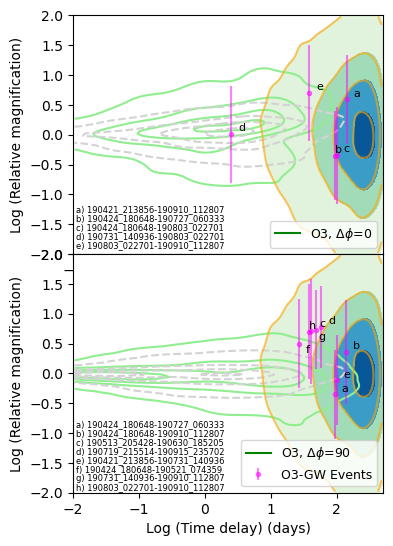

In [20]:

def read_hemanta_data(filename="./Hemanta_data/O3b plots/detectable_4_image_type_1/lensed_params_detectable.json"):
    ''' read Hemanta's data

    Parameters
    filename : name of the file to read

    Returns
    parameters : dictionary of parameters ('zl', 'zs', 'sigma', 'q', 'e1', 'e2', 'gamma1', 'gamma2', 'Dl', 'Ds', 'Dls', 'theta_E', 'gamma', 'mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'traces', 'determinants', 'image_type', 'weights', 'opt_snr_net', 'L1', 'H1', 'V1')

    Note: 
        * For image type 1, the signal-to-noise ratio of the first two events is always above threshold (SNR>8), i.e., detectable
        * For image type 2, the signal-to-noise ratio of the last two events is always above threshold (SNR>8), i.e., detectable
        * Each of the sample is weighted by 'weights' (see above for all dictionary keys)
    '''
    import json
    f = open(filename)
    params = json.loads(f.read())
    f.close()
    return params

def return_hemanta_data_same_type_images():
    ''' return Hemanta's data for same type images (type-I type-I or type-II type-II)

    Returns
    mag,tdel,idx : magnification, time delay, weights, and index of the sample

    Note:
        * The mag is defined to be the union of both of the magnifications (type-I,type-I and type-II, type-II)
    '''
    day = 24*3600 # Days in seconds
    # Extract the magnification and time delay distribution for O3 for Hemanta's catalog - quads only with first 2 or last 2 images detectable
    param = read_hemanta_data(filename="./Hemanta_data/O3b plots/phase_diff_0.json")
    mag = np.array(param['dmu'])
    tdel = np.array(param['dt']) # in days
    
    return mag,tdel

def return_hemanta_data_different_type_images():
    ''' return Hemanta's data for different type images (type-I type-II)

    Returns
    mag,tdel,idx : magnification, time delay, weights, and index of the sample

    Note:
        * The mag is defined to be the union of both of the magnifications (type-I,type-II; for quads, there are 2 pairs of such images)
    '''
    
    day = 24*3600 # Days in seconds
    # Extract the magnification and time delay distribution for O3 for Hemanta's catalog - quads only with first 2 or last 2 images detectable
    param = read_hemanta_data(filename="./Hemanta_data/O3b plots/phase_diff_90.json")
    mag = np.array(param['dmu'])
    tdel = np.array(param['dt']) # in days
    
    return mag,tdel



## O3 
det="O3"

fig = plt.figure(figsize=(4,3.1*2))
lab=np.array(["O3, $\Delta\phi$=0", "O3, $\Delta\phi$=90"])


def makeplot(names,kk,mag_comb, tdel_comb, gwm,gwt,gwmerr,amplitude_unlensed,td_unlensed,lab, mag_comb_hemanta, tdel_comb_hemanta):
    ''' make plot of mag vs tdel for a given SNR 

    Parameters
    names: list of names of the events
    kk : SNR index
    mag_comb : combined magnification
    tdel_comb : combined time delay
    gwm : GW magnification
    gwt : GW time delay
    gwmerr : GW magnification error
    amplitude_unlensed : unlensed amplitude
    td_unlensed : time delay for unlensed case
    lab : label for plot
    mag_comb_hemanta : combined magnification for second catalog (Hemanta's)
    tdel_comb_hemanta : combined time delay for second catalog (Hemanta's)
    '''
    
    # Label the gwnames in alphabetical order as a list 
    gwnames_abcd = np.array(['a','b','c','d','e','f','g','h','i','j','k','l','m','n'])
    # Cut out the labels that go over the length of the gwnames
    gwnames_abcd = gwnames_abcd[:len(names)]

    ax1=fig.add_subplot(2,1,kk)

    #######
    
    xxl,yyl,ffl=cf.contfunc(tdel_comb,mag_comb)
    xxl2,yyl2,ffl2=cf.contfunc(tdel_comb_hemanta,mag_comb_hemanta)
    
     
    ax1.plot(0,0,label=lab,color="g")
    levels_l=cf.contlevs(ffl) 
    levels_l2=cf.contlevs(ffl2)
    cset=ax1.contour(np.rot90(ffl), levels_l, colors='lightgreen', origin='upper', extent=extent_im)
    cset2=ax1.contour(np.rot90(ffl2), levels_l2, colors='lightgray', linestyles='dashed', origin='upper', extent=extent_im)
    
    
    xxu,yyu,ffu=cf.contfunc(td_unlensed,amplitude_unlensed)
    levels=cf.contlevs(ffu) 
    cset=ax1.contour(np.rot90(ffu), levels, colors='orange', alpha=0.6, origin='upper', extent=extent_im)
     
    levels_n=cf.contlevs(ffu, returnfirst=True) 
    #cfset = ax1.contourf(xxu, yyu,  ffu, levels_n,cmap='YlOrBr', alphas=0.1)
    cfset = ax1.contourf(xxu, yyu,  ffu, levels_n,cmap='GnBu', alphas=0.1)

   
    if(kk==1):
        ax1.errorbar(np.log10(gwt),np.log10(gwm),color="magenta",yerr=gwmerr/gwm/np.log(10.),fmt=".",alpha=0.5) 
        ax1.set_ylabel("Log (Relative magnification)")
        for i, txt in enumerate(names):
            ax1.annotate(gwnames_abcd[i], (np.log10(gwt[i]),np.log10(gwm[i])), xytext=(np.log10(gwt[i])+0.1,np.log10(gwm[i])),color="black", fontsize=8)
    if(kk==2): 
        #ax1.tick_params(left = False, labelleft = False )
        ax1.errorbar(np.log10(gwt),np.log10(gwm),label="O3-GW Events",color="magenta",yerr=gwmerr/gwm/np.log(10.),alpha=0.5,fmt=".") 
        ax1.set_ylabel("Log (Relative magnification)")
        for i, txt in enumerate(names):
            ax1.annotate(gwnames_abcd[i], (np.log10(gwt[i]),np.log10(gwm[i])), xytext=(np.log10(gwt[i])+0.1,np.log10(gwm[i])),color="black", fontsize=8)
    # Create a tick annotation label top-left that makes an arrow to the errorbar ticks
    # Adjust texts
    from adjustText import adjust_text
    adjust_text(ax1.texts, only_move={'points':'y', 'text':'y'})

    # Now add the actual gw names to the very top of the plot
    for i, txt in enumerate(names):
        if kk == 1:
            yshift = -1.3
        if kk == 2:
            yshift = -0.9
        ax1.annotate(gwnames_abcd[i]+") "+txt, (np.log10(gwt[i]),np.log10(gwm[i])), xytext=(-1.95,-0.15*i+yshift),color="black", fontsize=6)

    
    ax1.set_xlabel("Log (Time delay) (days)")
    plt.legend(loc="lower right",fontsize=9)

    # Print out the names and the corresponding alphabets
    for i, txt in enumerate(names):
        print(gwnames_abcd[i], txt)
    print("")


## Extract the magnification and time delay distribution for O3 - quads and doubles
mag31,tdel31,mag32,tdel32,mag41,tdel41,mag42,tdel42,mag21,tdel21,mag43,tdel43,dbmg21,dbtd21= sn.getsnr_forpairs(det)
print(mag31.size,mag32.size,mag41.size,mag42.size, mag21.size,mag43.size, dbmg21.size)
## phase diff of 0
mag1=np.concatenate((mag21,mag43))
tdel1=np.concatenate((tdel21,tdel43))
idx1=(tdel1>1e-3) & (mag1>5e-2)
## phase diff of 90
mag2=np.concatenate([mag31,mag32,mag41,mag42,dbmg21])
tdel2=np.concatenate([tdel31,tdel32,tdel41,tdel42,dbtd21])
idx2=(tdel2>1e-3) & (mag2>5e-2)

# Next we extract the same information as above from Hemanta's catalog 
mag1_hemanta,tdel1_hemanta = return_hemanta_data_same_type_images()
mag2_hemanta,tdel2_hemanta = return_hemanta_data_different_type_images()

#### Unlensed pairs
td_unlensed,amplitude_unlensed=np.loadtxt("unlensedpairs/unlensedpairs_tdmag_%s.txt"%(det),unpack=1) 
idxu=(td_unlensed>1e-3) & (amplitude_unlensed>1e-3)

## GW events difference of gps times; in seconds
gwtdel0,gwrmag0,gwmerr0=np.loadtxt("gwevents_O3/gwevents_phdf0.txt",usecols=(2,3,4),unpack=1)
gwtdel90,gwrmag90,gwmerr90=np.loadtxt("gwevents_O3/gwevents_phdf90.txt",usecols=(2,3,4),unpack=1)
# Get the names (column 1) of the GW events
gwname0_0=np.loadtxt("gwevents_O3/gwevents_phdf0.txt",usecols=(0,),dtype=str)
gwname0_1=np.loadtxt("gwevents_O3/gwevents_phdf0.txt",usecols=(1,),dtype=str)
gwname90_0=np.loadtxt("gwevents_O3/gwevents_phdf90.txt",usecols=(0,),dtype=str)
gwname90_1=np.loadtxt("gwevents_O3/gwevents_phdf90.txt",usecols=(1,),dtype=str)
#  Combine the names of the GW events in string format "event1--event2"
gwname0=np.array([gwname0_0[i][2:]+"-"+gwname0_1[i][2:] for i in range(gwname0_0.size)])
gwname90=np.array([gwname90_0[i][2:]+"-"+gwname90_1[i][2:] for i in range(gwname90_0.size)])

xmin =np.log10(1e-2) 
xmax =np.log10(5e2)  
ymin =np.log10(1e-2)    
ymax =np.log10(1e2)  
extent_im=[xmin, xmax, ymin, ymax]

makeplot(gwname0,1,mag1[idx1],tdel1[idx1],gwrmag0,gwtdel0/3600/24,gwmerr0,amplitude_unlensed[idxu],td_unlensed[idxu],lab[0], mag1_hemanta, tdel1_hemanta)
makeplot(gwname90,2,mag2[idx2],tdel2[idx2],gwrmag90,gwtdel90/3600/24,gwmerr90,amplitude_unlensed[idxu],td_unlensed[idxu],lab[1], mag2_hemanta, tdel2_hemanta)

plt.subplots_adjust(hspace=0.,wspace=0.02)
plt.savefig("O3_comb.pdf", bbox_inches='tight')
plt.show()